In [2]:
import numpy as np


In [3]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [4]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

times, R = find_tranformation_matrix(10, E, N, Tmax)

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    times, R = find_tranformation_matrix(b[i], E, N, Tmax)
    if np.round(times[-1]) == Tmax:
        print('no extinction') 
        mixing_times.append(Tmax)
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
            p_mix_index = np.min(np.where(R==1)[0])
            t_p_mixing += times[p_mix_index]
    else:
        print('system does go extinct')
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E, N, Tmax)
            p_mix_index = np.min(np.where(R==1)[0])
            t_mixing += times[-1]
            t_p_mixing += times[p_mix_index]
        mixing_times.append(t_mixing/10)
    p_mixing_times.append(t_p_mixing/10)
    print(t_mixing/10)
    print(t_p_mixing/10)


print(mixing_times)
print(p_mixing_times)


system does go extinct
8.608743992994366
7.4755743328326245
system does go extinct
10.891192218006818
9.146754148336374
system does go extinct
17.406142774673977
15.110519464926657
system does go extinct
41.84723755577844
32.24343919531359
no extinction
0.0
60.30116644756659
no extinction
0.0
35.279686510039674
no extinction
0.0
25.9839857650963
no extinction
0.0
20.469633927282615
no extinction
0.0
16.968217728983895
no extinction
0.0
14.705208747919112
no extinction
0.0
12.682479552605125
no extinction
0.0
11.675945221477868
no extinction
0.0
10.916603744355678
no extinction
0.0
10.026456732902973
no extinction
0.0
9.389389061658495
no extinction
0.0
8.627514523220736
no extinction
0.0
7.807214793610217
no extinction
0.0
7.872001810284336
no extinction
0.0
7.197982614214084
no extinction
0.0
7.4137193097866145
no extinction
0.0
7.574525455385272
no extinction
0.0
6.834509702608017
no extinction
0.0
6.375382619506392
no extinction
0.0
6.073676922295524
no extinction
0.0
5.965996746882

In [6]:
mixing = [8.608743992994366, 10.891192218006818, 17.406142774673977, 41.84723755577844, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
b = np.linspace(0.00002, 1.5, 30)
pseudo_mixing = [7.4755743328326245, 9.146754148336374, 15.110519464926657, 32.24343919531359, 60.30116644756659, 35.279686510039674, 25.9839857650963, 20.469633927282615, 16.968217728983895, 14.705208747919112, 12.682479552605125, 11.675945221477868, 10.916603744355678, 10.026456732902973, 9.389389061658495, 8.627514523220736, 7.807214793610217, 7.872001810284336, 7.197982614214084, 7.4137193097866145, 7.574525455385272, 6.834509702608017, 6.375382619506392, 6.073676922295524, 5.965996746882174, 5.797798751084427, 5.768000948061259, 6.186083152731015, 5.574812943612001, 4.410102113079989]


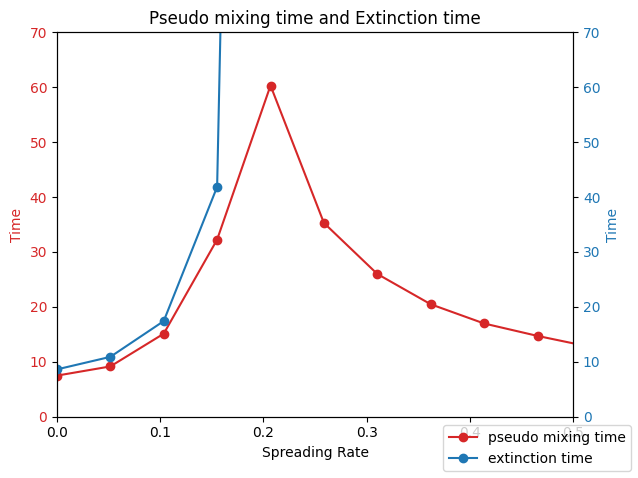

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pseudo_mixing, color=color, marker = 'o', label= 'pseudo mixing time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.5)
ax1.set_ylim(0, 70)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax2.plot(b, mixing, color=color, marker = 'o', label = 'extinction time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 70)

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time and Extinction time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [18]:
import numpy as np
b = np.linspace(0.000001, 0.1, 30)
import networkx as nx
N = 2000
## choose network from network X and change M0 and G
M0 = 30
Tmax = 500

G = nx.barabasi_albert_graph(N, M0)

## return edge matrix (required for the simulation)
E_barabasi = list(G.edges)

p_mixing_times = []
mixing_times = []

for i in range(len(b)):
    t_mixing = 0
    t_p_mixing = 0
    times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax)
    if np.round(times[-1]) == Tmax:
        print('no extinction') 
        mixing_times.append(Tmax)
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax, 1)
            p_mix_index = np.min(np.where(R==1)[0])
            t_p_mixing += times[p_mix_index]
    else:
        print('system does go extinct')
        for j in range(10):
            times, R = find_tranformation_matrix(b[i], E_barabasi, N, Tmax)
            p_mix_index = np.min(np.where(R==1)[0])
            t_mixing += times[-1]
            t_p_mixing += times[p_mix_index]
        mixing_times.append(t_mixing/10)
    p_mixing_times.append(t_p_mixing/10)
    print(t_mixing/10)
    print(t_p_mixing/10)


print(mixing_times)
print(p_mixing_times)


system does go extinct
8.327236739072431
7.103048409781787
system does go extinct
11.168306871792593
9.199859282730516
system does go extinct
15.528485879475179
12.344172353922138
system does go extinct
46.61604448627586
31.707073201778872
no extinction
0.0
42.53579404524667
no extinction
0.0
30.510336489457366
no extinction
0.0
24.191462145271515
no extinction
0.0
20.928372286186026
no extinction
0.0
18.79953511591301
no extinction
0.0
15.461504751159634
no extinction
0.0
14.046490472995913
no extinction
0.0
12.848574368895243
no extinction
0.0
12.231989066899633
no extinction
0.0
10.888215310683947
no extinction
0.0
10.775633441884347
no extinction
0.0
9.693252698958233
no extinction
0.0
8.981087540930755
no extinction
0.0
8.260034529976929
no extinction
0.0
7.943460290301457
no extinction
0.0
7.682571764993911
no extinction
0.0
7.410718310045122
no extinction
0.0
7.1629640776565155
no extinction
0.0
6.4733279203233405
no extinction
0.0
6.6498894448011825
no extinction
0.0
6.14203519

In [19]:
mixing_times_bar =[8.327236739072431, 11.168306871792593, 15.528485879475179, 46.61604448627586, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]
p_mixing_times_bar = [7.103048409781787, 9.199859282730516, 12.344172353922138, 31.707073201778872, 42.53579404524667, 30.510336489457366, 24.191462145271515, 20.928372286186026, 18.79953511591301, 15.461504751159634, 14.046490472995913, 12.848574368895243, 12.231989066899633, 10.888215310683947, 10.775633441884347, 9.693252698958233, 8.981087540930755, 8.260034529976929, 7.943460290301457, 7.682571764993911, 7.410718310045122, 7.1629640776565155, 6.4733279203233405, 6.6498894448011825, 6.142035191541018, 5.9402566166413875, 5.822146938063372, 5.553712751307372, 5.502659574937679, 5.138951878887665]
b_bar = np.linspace(0.000001, 0.2, 30)


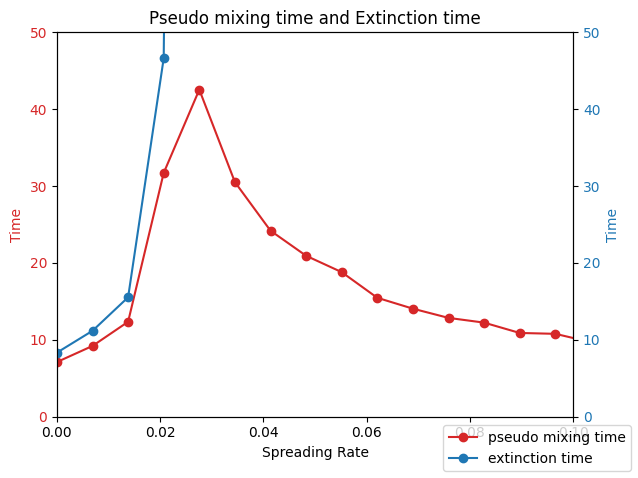

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b_bar, p_mixing_times_bar, color=color, marker = 'o', label= 'pseudo mixing time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.1)
ax1.set_ylim(0, 50)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax2.plot(b_bar, mixing_times_bar, color=color, marker = 'o', label = 'extinction time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 50)

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time and Extinction time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
